In [1]:
import numpy as np
from alpaca.statistics.chisquared import chi2_obs, combine_chi2
from alpaca.statistics.functions import nsigmas
from functools import lru_cache

In [2]:
from alpaca.models import model_library
from alpaca.experimental_data.measurements_exp import belle_Y1S_mumu, besIII_Jpsivis, babar_Y1s_mumu, belle_Y1S_tautau, babar_Y1s_cc, babar_Y_hadrons, besiii_Jpsi_mumu
from alpaca import ALPcouplings
from alpaca.decays import branching_ratio

In [3]:
ma = np.logspace(-1, 1, 80)
fa = np.logspace(2, 5, 50)
x_ma, y_fa = np.meshgrid(ma, fa)
x_ma, y_fainv = np.meshgrid(ma, 1/fa)

In [4]:
@np.vectorize
@lru_cache
def get_couplings(f):
    return model_library.QED_DFSZ.get_couplings({model_library.beta: np.pi/4}, f).match_run(10, 'VA_below', matching_scale=80, integrator='leadinglog')

In [5]:
def obsY1S(ma, fa):
    couplings = get_couplings(fa)
    return branching_ratio('Y(1S) -> gamma mu mu', ma, couplings, fa, integrator='no_rge')

def obsY1Stau(ma, fa):
    couplings = get_couplings(fa)
    return branching_ratio('Y(1S) -> gamma ta ta', ma, couplings, fa, integrator='no_rge')

def obsY1Scc(ma, fa):
    couplings = get_couplings(fa)
    return branching_ratio('Y(1S) -> gamma c c', ma, couplings, fa, integrator='no_rge')

def obsY3Sh(ma, fa):
    couplings = get_couplings(fa)
    return branching_ratio('Y(3S) -> gamma hadrons', ma, couplings, fa, integrator='no_rge')

def obsJpsi(ma, fa):
    couplings = get_couplings(fa)
    return branching_ratio('J/psi -> gamma gamma gamma', ma, couplings, fa, integrator='no_rge')

def obsJpsimu(ma, fa):
    couplings = get_couplings(fa)
    return branching_ratio('J/psi -> gamma mu mu', ma, couplings, fa, integrator='no_rge')

In [6]:
mesh_Y1S = chi2_obs(obsY1S, belle_Y1S_mumu, ma, fa)

/home/jorge/Documents/alpaca/alp-aca/alpaca/statistics/chisquared.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  thpred[valid,...] = observable(ma_m[valid,...], obsargs_m[valid,...])


In [7]:
mesh_Y1Sbabar = chi2_obs(obsY1S, babar_Y1s_mumu, ma, fa)

In [8]:
mesh_Y1Stau = chi2_obs(obsY1Stau, belle_Y1S_tautau, ma, fa)

In [9]:
mesh_Y1Sc = chi2_obs(obsY1Scc, babar_Y1s_cc, ma, fa)

In [10]:
mesh_Jpsi = chi2_obs(obsJpsi, besIII_Jpsivis, ma, fa)

In [11]:
mesh_Jpsimu = chi2_obs(obsJpsimu, besiii_Jpsi_mumu, ma, fa)

In [12]:
mesh_Y3Sh = chi2_obs(obsY3Sh, babar_Y_hadrons, ma, fa)

In [13]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
plt.rcParams.update({'text.usetex':True})

In [14]:
mesh_chi2tot = combine_chi2(mesh_Jpsi, mesh_Y1S, mesh_Y1Sbabar, mesh_Y1Stau, mesh_Y1Sc, mesh_Jpsimu, mesh_Y3Sh)

Text(0.5, 1.0, 'QED-DFSZ $\\tan\\beta=1$')

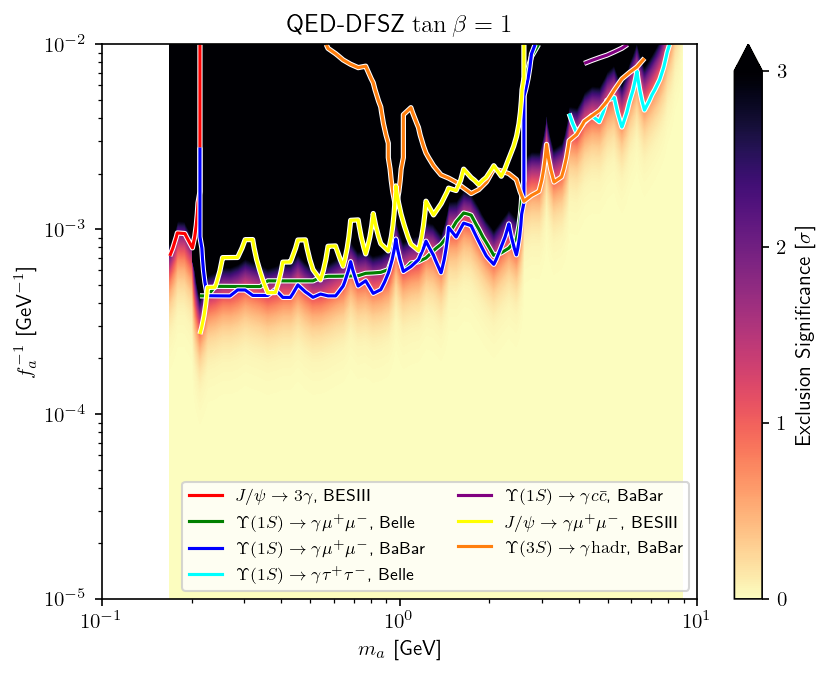

In [15]:
plt.figure(dpi=150)
pc = plt.contourf(x_ma, y_fainv, nsigmas(mesh_chi2tot,2).T, levels=list(np.linspace(0, 3, 500)), cmap='magma_r', vmax=3, extend='max')
l2 = plt.contour(x_ma, y_fainv, nsigmas(mesh_Jpsi,2).T, levels=[2], colors='r')
l2.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l1 = plt.contour(x_ma, y_fainv, nsigmas(mesh_Y1S,2).T, levels=[2], colors='g')
l1.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l3 = plt.contour(x_ma, y_fainv, nsigmas(mesh_Y1Sbabar,2).T, levels=[2], colors='b')
l3.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l4 = plt.contour(x_ma, y_fainv, nsigmas(mesh_Y1Stau,2).T, levels=[2], colors='cyan')
l4.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l5 = plt.contour(x_ma, y_fainv, nsigmas(mesh_Y1Sc,2).T, levels=[2], colors='purple')
l5.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l6 = plt.contour(x_ma, y_fainv, nsigmas(mesh_Y3Sh,2).T, levels=[2], colors='tab:orange')
l6.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l7 = plt.contour(x_ma, y_fainv, nsigmas(mesh_Jpsimu,2).T, levels=[2], colors='yellow')
l7.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cbar = plt.colorbar(pc, extend='max')
cbar.set_label(r'Exclusion Significance [$\sigma$]')
cbar.set_ticks(np.linspace(0, 3, 4))

legend_elements = [plt.Line2D([0], [0], color=c, label=l)
                   for c, l in zip(['r', 'g', 'b', 'cyan', 'purple', 'yellow', 'tab:orange'], [r'$J/\psi\to 3\gamma$, BESIII', r'$\Upsilon(1S)\to \gamma \mu^+\mu^-$, Belle', r'$\Upsilon(1S)\to \gamma \mu^+\mu^-$, BaBar', r'$\Upsilon(1S)\to \gamma \tau^+\tau^-$, Belle', r'$\Upsilon(1S)\to \gamma c \bar{c}$, BaBar', r'$J/\psi\to \gamma \mu^+\mu^-$, BESIII', r'$\Upsilon(3S)\to \gamma \mathrm{hadr}$, BaBar'])]
plt.legend(handles = legend_elements, loc='lower right', ncols=2, fontsize=8)
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'QED-DFSZ $\tan\beta=1$')

In [16]:
fa_beta = 1000

In [17]:
x_ma, y_tanbeta = np.meshgrid(ma, np.logspace(-2, 2, 100))

In [18]:
couplings_beta = [model_library.QED_DFSZ.get_couplings({model_library.beta: np.arctan(tanbeta)}, fa_beta).match_run(10, 'VA_below', integrator='leadinglog') for tanbeta in np.logspace(-2, 2, 100)]

In [19]:
def obsY1S_tanbeta(ma, couplings):
    return branching_ratio('Y(1S) -> gamma mu mu', ma, couplings, fa_beta, integrator='no_rge')

def obsY1Stau_tanbeta(ma, couplings):
    return branching_ratio('Y(1S) -> gamma tau tau', ma, couplings, fa_beta, integrator='no_rge')

def obsY3Sh_tanbeta(ma, couplings):
    return branching_ratio('Y(3S) -> gamma hadrons', ma, couplings, fa_beta, integrator='no_rge')

def obsY1Scc_tanbeta(ma, couplings):
    return branching_ratio('Y(1S) -> gamma c c', ma, couplings, fa_beta, integrator='no_rge')

def obsJpsi_tanbeta(ma, couplings):
    return branching_ratio('J/psi -> gamma gamma gamma', ma, couplings, fa_beta, integrator='no_rge')

def obsJpsimu_tanbeta(ma, couplings):
    return branching_ratio('J/psi -> gamma mu mu', ma, couplings, fa_beta, integrator='no_rge')

In [20]:
mesh_Y1S_tanbeta = chi2_obs(obsY1S_tanbeta, belle_Y1S_mumu, ma, couplings_beta)

/home/jorge/Documents/alpaca/alp-aca/alpaca/statistics/chisquared.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  thpred[valid,...] = observable(ma_m[valid,...], obsargs_m[valid,...])


In [21]:
mesh_Y1Sbabar_tanbeta = chi2_obs(obsY1S_tanbeta, babar_Y1s_mumu, ma, couplings_beta)

In [22]:
mesh_Y3Sh_tanbeta = chi2_obs(obsY3Sh_tanbeta, babar_Y_hadrons, ma, couplings_beta)

In [23]:
mesh_Y1Stau_tanbeta = chi2_obs(obsY1Stau_tanbeta, belle_Y1S_tautau, ma, couplings_beta)

In [24]:
mesh_Y1Sc_tanbeta = chi2_obs(obsY1Scc_tanbeta, babar_Y1s_cc, ma, couplings_beta)

In [25]:
mesh_Jpsi_tanbeta = chi2_obs(obsJpsi_tanbeta, besIII_Jpsivis, ma, couplings_beta)

In [26]:
mesh_Jpsimu_tanbeta = chi2_obs(obsJpsimu_tanbeta, besiii_Jpsi_mumu, ma, couplings_beta)

In [27]:
mesh_chi2tot_tanbeta = combine_chi2(mesh_Y1S_tanbeta, mesh_Y1Sbabar_tanbeta, mesh_Y3Sh_tanbeta, mesh_Y1Stau_tanbeta, mesh_Y1Sc_tanbeta, mesh_Jpsi_tanbeta, mesh_Jpsimu_tanbeta)

/tmp/ipykernel_72574/219775929.py:21: RuntimeWarning: invalid value encountered in sqrt
  ax_cuR = ax.secondary_yaxis('right', functions=(lambda x: 2*x**2/(1+x**2), lambda x: np.sqrt(x/(2-x))))
/tmp/ipykernel_72574/219775929.py:27: RuntimeWarning: invalid value encountered in sqrt
  ax_clL = ax.secondary_yaxis(1.15, functions=(lambda x: 2/(1+x**2), lambda x: np.sqrt((2-x)/x)))


Text(0.5, 1.0, 'QED-DFSZ, $f_a = 1\\,\\mathrm{TeV}$')

/tmp/ipykernel_72574/219775929.py:27: RuntimeWarning: divide by zero encountered in divide
  ax_clL = ax.secondary_yaxis(1.15, functions=(lambda x: 2/(1+x**2), lambda x: np.sqrt((2-x)/x)))
/tmp/ipykernel_72574/219775929.py:27: RuntimeWarning: invalid value encountered in sqrt
  ax_clL = ax.secondary_yaxis(1.15, functions=(lambda x: 2/(1+x**2), lambda x: np.sqrt((2-x)/x)))
/tmp/ipykernel_72574/219775929.py:21: RuntimeWarning: divide by zero encountered in divide
  ax_cuR = ax.secondary_yaxis('right', functions=(lambda x: 2*x**2/(1+x**2), lambda x: np.sqrt(x/(2-x))))
/tmp/ipykernel_72574/219775929.py:21: RuntimeWarning: invalid value encountered in sqrt
  ax_cuR = ax.secondary_yaxis('right', functions=(lambda x: 2*x**2/(1+x**2), lambda x: np.sqrt(x/(2-x))))


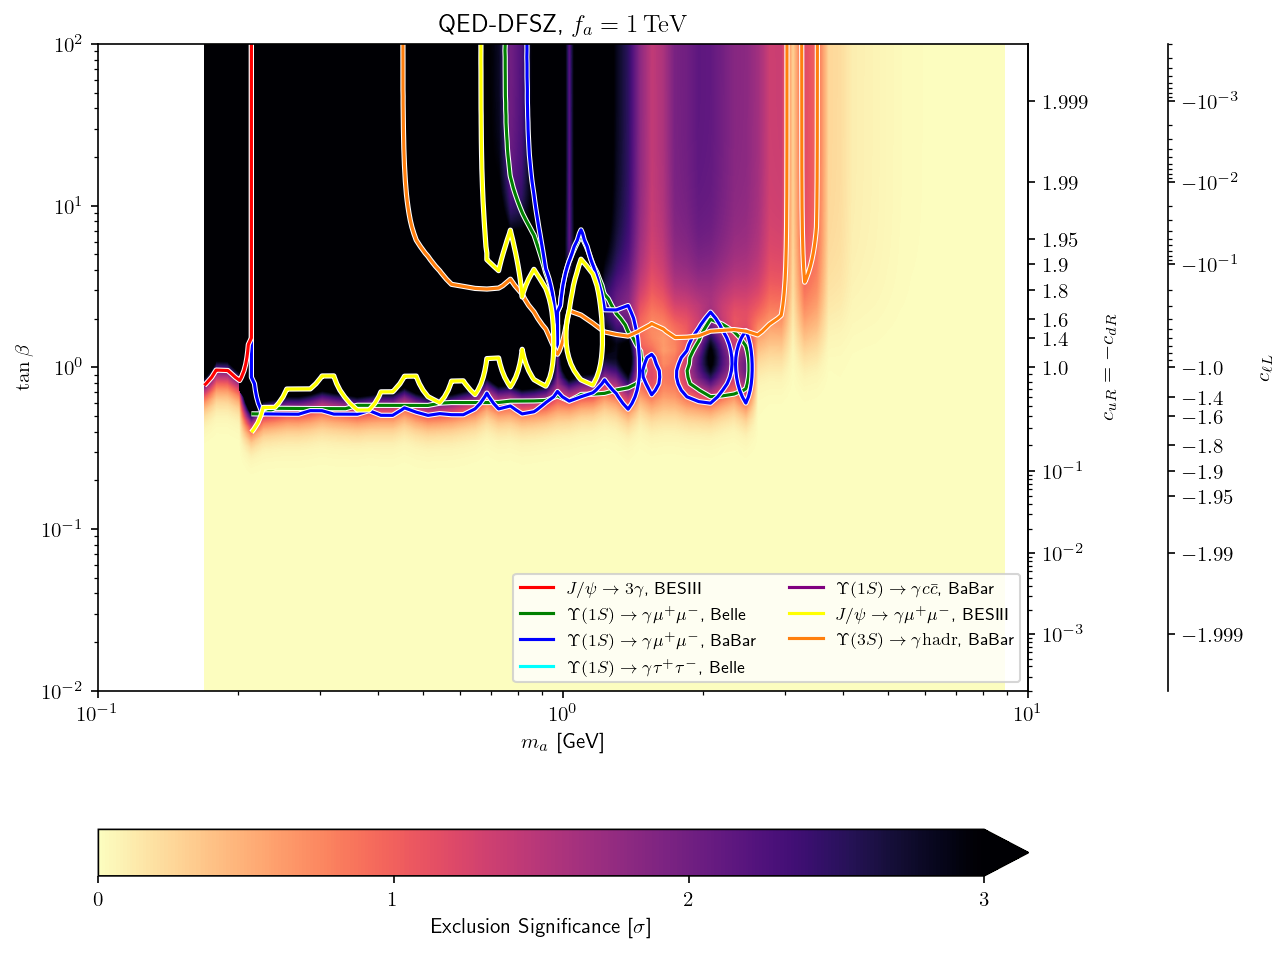

In [28]:
plt.figure(dpi=150, figsize=(8,8))
pc = plt.contourf(x_ma, y_tanbeta, nsigmas(mesh_chi2tot_tanbeta,2).T, levels=list(np.linspace(0, 3, 500)), cmap='magma_r', vmax=3, extend='max')
l1 = plt.contour(x_ma, y_tanbeta, nsigmas(mesh_Y1S_tanbeta,2).T, levels=[2], colors='g')
l1.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l3 = plt.contour(x_ma, y_tanbeta, nsigmas(mesh_Y1Sbabar_tanbeta,2).T, levels=[2], colors='b')
l3.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l4 = plt.contour(x_ma, y_tanbeta, nsigmas(mesh_Y1Stau_tanbeta,2).T, levels=[2], colors='cyan')
l4.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l6 = plt.contour(x_ma, y_tanbeta, nsigmas(mesh_Y3Sh_tanbeta,2).T, levels=[2], colors='tab:orange')
l6.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l5 = plt.contour(x_ma, y_tanbeta, nsigmas(mesh_Y1Sc_tanbeta,2).T, levels=[2], colors='purple')
l5.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l2 = plt.contour(x_ma, y_tanbeta, nsigmas(mesh_Jpsi_tanbeta,2).T, levels=[2], colors='r')
l2.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
l7 = plt.contour(x_ma, y_tanbeta, nsigmas(mesh_Jpsimu_tanbeta,2).T, levels=[2], colors='yellow')
l7.set_path_effects([patheffects.Stroke(linewidth=2.5, foreground='w'), patheffects.Normal()])
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

ax_cuR = ax.secondary_yaxis('right', functions=(lambda x: 2*x**2/(1+x**2), lambda x: np.sqrt(x/(2-x))))
ax_cuR.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1, 1.4, 1.6, 1.8, 1.9, 1.95, 1.99, 1.999])
ax_cuR.set_yticklabels([r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$1.0$', r'$1.4$', r'$1.6$', r'$1.8$', r'$1.9$', r'$1.95$', r'$1.99$', r'$1.999$'])
ax_cuR.set_ylabel(r'$c_{uR} = -c_{dR}$')


ax_clL = ax.secondary_yaxis(1.15, functions=(lambda x: 2/(1+x**2), lambda x: np.sqrt((2-x)/x)))
ax_clL.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1, 1.4, 1.6, 1.8, 1.9, 1.95, 1.99, 1.999])
ax_clL.set_yticklabels([r'$-10^{-4}$', r'$-10^{-3}$', r'$-10^{-2}$', r'$-10^{-1}$', r'$-1.0$', r'$-1.4$', r'$-1.6$', r'$-1.8$', r'$-1.9$', r'$-1.95$', r'$-1.99$', r'$-1.999$'])
ax_clL.set_ylabel(r'$c_{\ell L}$')

plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$\tan\beta$')

cbar = plt.colorbar(pc, extend='max', orientation='horizontal')
cbar.set_label(r'Exclusion Significance [$\sigma$]')
cbar.set_ticks(np.linspace(0, 3, 4))

legend_elements = [plt.Line2D([0], [0], color=c, label=l)
                   for c, l in zip(['r', 'g', 'b', 'cyan', 'purple', 'yellow', 'tab:orange'], [r'$J/\psi\to 3\gamma$, BESIII', r'$\Upsilon(1S)\to \gamma \mu^+\mu^-$, Belle', r'$\Upsilon(1S)\to \gamma \mu^+\mu^-$, BaBar', r'$\Upsilon(1S)\to \gamma \tau^+\tau^-$, Belle', r'$\Upsilon(1S)\to \gamma c \bar{c}$, BaBar', r'$J/\psi\to \gamma \mu^+\mu^-$, BESIII', r'$\Upsilon(3S)\to \gamma \mathrm{hadr}$, BaBar'])]
plt.legend(handles = legend_elements, loc='lower right', ncols=2, fontsize=8)

plt.title(r'QED-DFSZ, $f_a = 1\,\mathrm{TeV}$')